In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA

In [6]:
print('============================================================')
print('*** a) Đọc tập tin dữ liệu Student_12f.xls vào dataframe ***')
print('============================================================')

# Default folder: 'C:\Users\AnTe'
# Muốn biết [default folder] thì thực hiện [File > Open]
LDS3folder = 'E:\Data Science\Mathematics and Statistics for Data Science\Excercise'
folder = LDS3folder + '/Data/B3/'
data = pd.read_excel(folder + 'Student_12f.xls')
print(data.head(), '\n')

*** a) Đọc tập tin dữ liệu Student_12f.xls vào dataframe ***
         f1         f2        f3        f4        f5        f6         f7  \
0 -2.403589  -0.218339 -3.015506  2.187585 -1.415101 -0.000049   2.920957   
1 -0.922966   6.564721  8.542600 -3.676891  1.526910 -6.132242  -1.284702   
2  9.381326  -0.157043  9.674137  4.059390  9.150245 -8.320246  10.076978   
3 -7.610665 -10.375051  0.398027 -6.178855  5.848558  2.276540  -1.726164   
4  8.586239  -4.265564  4.788978  4.309953  2.938052 -4.294121   6.980088   

          f8         f9       f10       f11       f12  Class  
0  -4.165317  -2.237563  1.567810  4.056278 -5.816942      3  
1  -7.841047  10.161966 -1.933277  8.959247 -2.492584      4  
2 -11.596349  -2.900057 -1.890156  0.390029 -5.383296      0  
3   9.378226   1.146725 -9.630693 -8.620247 -0.552103      2  
4  -9.878268  -5.017204  0.154492  7.647917 -1.004416      0   



*** b) Áp dụng PCA để giảm xuống còn k chiều (2 < k < 12) ***
CÁCH 1: Chọn k dựa trên đồ thị biểu diễn phương sai tích lũy


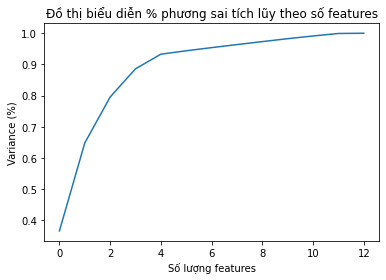

Phân tích chi tiết theo k:
   * k =  1 --> phương sai tích lũy 37%
- Chuyển vị của ma trận vectơ riêng P_T (1, 13) : 
 [[ 0.06650186  0.29755124 -0.36777911  0.03268674 -0.41400539  0.02265039
  -0.42027992  0.46078739 -0.03660494  0.352462    0.06164317  0.28185023
  -0.03206737]] 

- Ma trận trị riêng LAMBDA (1,) : 
 [150.14738749] 

   * k =  2 --> phương sai tích lũy 65%
- Chuyển vị của ma trận vectơ riêng P_T (2, 13) : 
 [[ 0.06650186  0.29755124 -0.36777911  0.03268674 -0.41400539  0.02265039
  -0.42027992  0.46078739 -0.03660494  0.352462    0.06164317  0.28185023
  -0.03206737]
 [-0.45791877 -0.36500087 -0.02739929 -0.33311383  0.11820036  0.00266203
  -0.12800687  0.50921833  0.08198683 -0.2620919  -0.41748437  0.07695924
   0.00847419]] 

- Ma trận trị riêng LAMBDA (2,) : 
 [150.14738749 115.78706074] 

   * k =  3 --> phương sai tích lũy 80%
- Chuyển vị của ma trận vectơ riêng P_T (3, 13) : 
 [[ 6.65018582e-02  2.97551242e-01 -3.67779107e-01  3.26867355e-02
  -4.14005389e-01

In [3]:
print('=============================================================')
print('*** b) Áp dụng PCA để giảm xuống còn k chiều (2 < k < 12) ***')
print('=============================================================')
#   https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
#   - The pca.explained_variance_ratio_ returns a vector of the variance explained by each dimension.
#   - The pca.explained_variance_ratio_[i] gives the variance explained solely by the i+1st dimension.
#   - The pca.explained_variance_ratio_.cumsum() will return a vector x 
#     such that x[i] returns the cumulative variance explained by the first i+1 dimensions.

#   (1) PCA().components_: Chuyển vị của ma trận vectơ riêng EigenVectors.T
#   (2) PCA().explained_variance_: Các giá trị riêng
#   (3) PCA().explained_variance_ratio_: Tỷ lệ phương sai so với dữ liệu gốc
#   (4) Hàm numpy.cumsum()

# -------------------------------------------------------------
# CÁCH 1: Chọn k dựa trên đồ thị biểu diễn phương sai tích lũy
# -------------------------------------------------------------
print('CÁCH 1: Chọn k dựa trên đồ thị biểu diễn phương sai tích lũy')
pca = PCA().fit(data)

# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Số lượng features')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features')
plt.show()

# Nhận xét:
#   - #f =  0: giữ lại    0%  phương sai so với dữ liệu gốc
#   - #f =  3: giữ lại ~ 85%  phương sai so với dữ liệu gốc
#   - #f >  3: giữ lại > 90%  phương sai so với dữ liệu gốc
#   - #f = 12: giữ lại   100% phương sai so với dữ liệu gốc
#

print('Phân tích chi tiết theo k:')
for k in range(1, 13):
    pca = PCA(k)
    pca.fit(data)

    var = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' % k, '--> phương sai tích lũy %.0f%%' % var)

    # Test - BEGIN
    print('- Chuyển vị của ma trận vectơ riêng P_T', pca.components_.shape, ': \n',
          pca.components_, '\n')
    print('- Ma trận trị riêng LAMBDA', pca.explained_variance_.shape, ': \n',
          pca.explained_variance_, '\n')
    # Test - END

In [4]:
# ---------------------------------------------------------------
# CÁCH 2: Chọn k dựa trên ngưỡng phương sai (tích lũy) mong muốn
# ---------------------------------------------------------------
print('\nCÁCH 2: Chọn k dựa trên ngưỡng phương sai (tích lũy) mong muốn')
# Giả sử muốn giữ lại 90%
threshold = .9
percent = threshold * 100
pca = PCA(threshold)

pca.fit(data)
k = pca.n_components_
var = sum(pca.explained_variance_ratio_) * 100
print('   Muốn phương sai tích lũy >= %.0f%%' % percent, 'thì k >= %d' % k,
      ' (k = %d' % k, '--> %.0f%%)' % var)

print('\nPhân tích chi tiết theo ngưỡng phương sai:')
A = np.array([.5, .6, .7, .8, .9, .95, .99])
for x in A:
    percent = x * 100
    pca = PCA(x)

    pca.fit(data)
    k = pca.n_components_
    var = sum(pca.explained_variance_ratio_) * 100
    print('   Muốn phương sai tích lũy >= %.0f%%' % percent, 'thì k >= %2d' % k,
          ' (k = %2d' % k, '--> %.0f%%)' % var)


CÁCH 2: Chọn k dựa trên ngưỡng phương sai (tích lũy) mong muốn
   Muốn phương sai tích lũy >= 90% thì k >= 5  (k = 5 --> 93%)

Phân tích chi tiết theo ngưỡng phương sai:
   Muốn phương sai tích lũy >= 50% thì k >=  2  (k =  2 --> 65%)
   Muốn phương sai tích lũy >= 60% thì k >=  2  (k =  2 --> 65%)
   Muốn phương sai tích lũy >= 70% thì k >=  3  (k =  3 --> 80%)
   Muốn phương sai tích lũy >= 80% thì k >=  4  (k =  4 --> 89%)
   Muốn phương sai tích lũy >= 90% thì k >=  5  (k =  5 --> 93%)
   Muốn phương sai tích lũy >= 95% thì k >=  7  (k =  7 --> 95%)
   Muốn phương sai tích lũy >= 99% thì k >= 11  (k = 11 --> 99%)


*** c) Giảm chiều còn k = 2 và trực quan hóa dữ liệu ***
- Ma trận B_T (1000, 2)
   Component 1  Component 2
0    -0.692211    -1.070005
1    -4.781787    -3.437346
2   -16.692405    -8.542941
3    -3.687761    24.972640
4    -8.926874    -9.483645 



<Figure size 576x432 with 0 Axes>

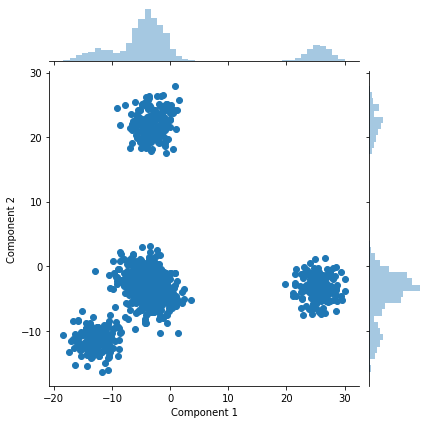

In [5]:
print('========================================================')
print('*** c) Giảm chiều còn k = 2 và trực quan hóa dữ liệu ***')
print('========================================================')
k = 2
pca = PCA(k)
pca.fit(data)

# transform data
B = pca.transform(data)
print('- Ma trận B_T', B.shape)

principalDf = pd.DataFrame(data=B, columns=['Component 1', 'Component 2'])
print(principalDf.head(), '\n')

plt.figure(figsize=(8, 6))
sns.jointplot(x='Component 1', y='Component 2', data=principalDf)
plt.show()